<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 1 </h2><h3>Specialist Diploma in Data Analytics</h3></th>
    </tr>
</table>

### Introduction: Problem Understanding

In this project the prediction of supermarket sales using exploratory machine learning techniques are implemented. Basically, the forecasting of sales plays important role for marketing, retailing, whole saling and manufacturing and this is done in different companies. This proposed system will allow the companies to plan better strategy and achieve revenue sales and will give better growth for the future in companies. Compared to the other learning methods, this machine learning method gives accurate result.  In the entire system the feature selection, data transformation and data exploration will plays important role and gives effective output in terms of accuracy.The data (‘supermarket.csv’) have been collected at various supermarket outlets and stores in different cities. The aim is to predict the sales of each product at a particular outlet. Using this, supermarket management team will try to understand the a of products and outlets which play a key role in increasing sales
This is a supervised machine learning problem with a target label as (Item_Outlet_Sales)
Also since we are expected to predict the sale price for a given product, it becomes a regression task.
We perform different operations on data like Data preprocessing,checks outliers,handle missing values,transformation,Data encoding and at the end built and train linear regression model
 

In [1]:
# import the pacakges
import pandas as pd # for data manupulation or analysis
import numpy as np # for numeric calculation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization

### Step 1: Load Data into Jupyter Notebook

In [2]:
#read the dataset
df = pd.read_csv('supermarket.csv')
df


Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998         NaN               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

In [3]:
#head fun to show first 5 rows

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df.head(5)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [4]:
#tail fun to show last 5 rows
df.tail(5)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

               Item_Type  Item_MRP Outlet_Identifier  \
8518         Snack Foods  214.5218            OUT013   
8519        Baking Goods  108.1570            OUT045   
8520  Health and Hygiene   85.1224            OUT035   
8521         Snack Foods  103.1332            OUT018   
8522         Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700

In [5]:
#shape of the dataset
df.shape

(8523, 12)

dataset contain 8523 rows and 12 columns

In [6]:
#information about dataset
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


12 features:Numerics-5 ,Categorical-7. Total no. of entries: 8523. Memory -800 KB

Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values. When this method is applied to a series of string, it returns a different output which is shown in the examples below. Return type: Statistical summary of data frame.

In [7]:
df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

Data Collection:1985 to 2009.   Item_visibiabiltiy has a maximum value of 0.000.  Item_weight has count less then 8523

In [8]:
#show unique value in each columns
df.apply(lambda x: len(x.unique()))


Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

### Step 2: Data Preprocessing

Data preprocessing involves transforming raw data to well-formed data sets so that data mining analytics can be applied. Raw data is often incomplete and has inconsistent formatting. The adequacy or inadequacy of data preparation has a direct correlation with the success of any project that involve data analyics

In [9]:
#check empty value in dataset
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
#shows columns name
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [11]:
#shows datatype of columns
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [12]:
# Check for duplicates
idsTotal = df.shape[0]
idsDupli = df[df['Item_Identifier'].duplicated()]
print(f'There are {len(idsDupli)} duplicate IDs for {idsTotal} total entries')

There are 6964 duplicate IDs for 8523 total entries


This shows that our Item_Identifier has some duplicate values. since a product can exist in more than one store it is expected for this repetition.

In [13]:
#shows categorical  columns in dataframe
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [14]:
#remove Item_Identifier and Outlet_Identifier columns
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [15]:
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [16]:
item_weight_mean = df.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean

Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
DRB24                  8.785
DRB25                 12.300
DRB48                 16.750
DRC01                  5.920
DRC12                 17.850
DRC13                  8.260
DRC24                 17.850
DRC25                  5.730
DRC27                 13.800
DRC36                 13.000
DRC49                  8.670
DRD01                 12.100
DRD12                  6.960
DRD13                 15.000
DRD15                 10.600
DRD24                 13.850
DRD25                  6.135
DRD27                 18.750
DRD37                  9.800
DRD49                  9.895
DRD60                 15.700
DRE01                 10.100
DRE03                 19.600
DRE12                  4.590
DRE13                  6.280
DRE15                 13.350
DRE25                 15.350
DRE27                 11.850
DRE37                 13.500
DRE48                  8.430
DRE49                 20.750
DRE60                  9.395
DRF01                  5.655
DRF03                 19.100
DRF13                 12.100
DRF15                 18.350
DRF23                  4.610
DRF25                  9.000
DRF27                  8.930
DRF36                 16.100
DRF37                 17.250
DRF48                  5.730
DRF49                  7.270
DRF51                 15.750
DRF60                 10.800
DRG01                 14.800
DRG03                 14.500
DRG11                  6.385
DRG13                 17.250
DRG15                  6.130
DRG23                  8.880
DRG25                 10.500
DRG27                  8.895
DRG36                 14.150
DRG37                 16.200
DRG39                 14.150
DRG48                  5.780
DRG49                  7.810
DRG51                 12.100
DRH01                 17.500
DRH03                 17.250
DRH11                  5.980
DRH13                  8.575
DRH15                  8.775
DRH23                 14.650
DRH25                 18.700
DRH36                 16.200
DRH37                 17.600
DRH39                 20.700
DRH49                 19.700
DRH51                 17.600
DRH59                 10.800
DRI01                  7.970
DRI03                  6.030
DRI11                  8.260
DRI13                 15.350
DRI23                 18.850
DRI25                 19.600
DRI37                 15.850
DRI39                 13.800
DRI47                 14.700
DRI49                 14.150
DRI51                 17.250
DRI59                  9.500
DRJ01                  6.135
DRJ11                  9.500
DRJ13                 12.650
DRJ23                 18.350
DRJ24                 11.800
DRJ25                 14.600
DRJ35                 10.100
DRJ37                 10.800
DRJ39                 20.250
DRJ47                 18.250
DRJ49                  6.865
DRJ51                 14.100
DRJ59                 11.650
DRK01                  7.630
DRK11                  8.210
DRK12                  9.500
DRK13                 11.800
DRK23                  8.395
DRK35                  8.365
DRK37                  5.000
DRK39                  7.020
DRK47                  7.905
DRK49                 14.150
DRK59                  8.895
DRL01                 19.500
DRL11                 10.500
DRL23                 18.350
DRL35                 15.700
DRL37                 15.500
DRL47                 19.700
DRL49                 13.150
DRL59                 16.750
DRL60                  8.520
DRM11                  6.570
DRM23                 16.600
DRM35                  9.695
DRM37                 15.350
DRM47                  9.300
DRM48                 15.200
DRM49                  6.110
DRM59                  5.880
DRN11                  7.850
DRN35                  8.010
DRN36                 15.200
DRN37                  9.600
DRN47                 12.100
DRN59                 15.000
DRO35          

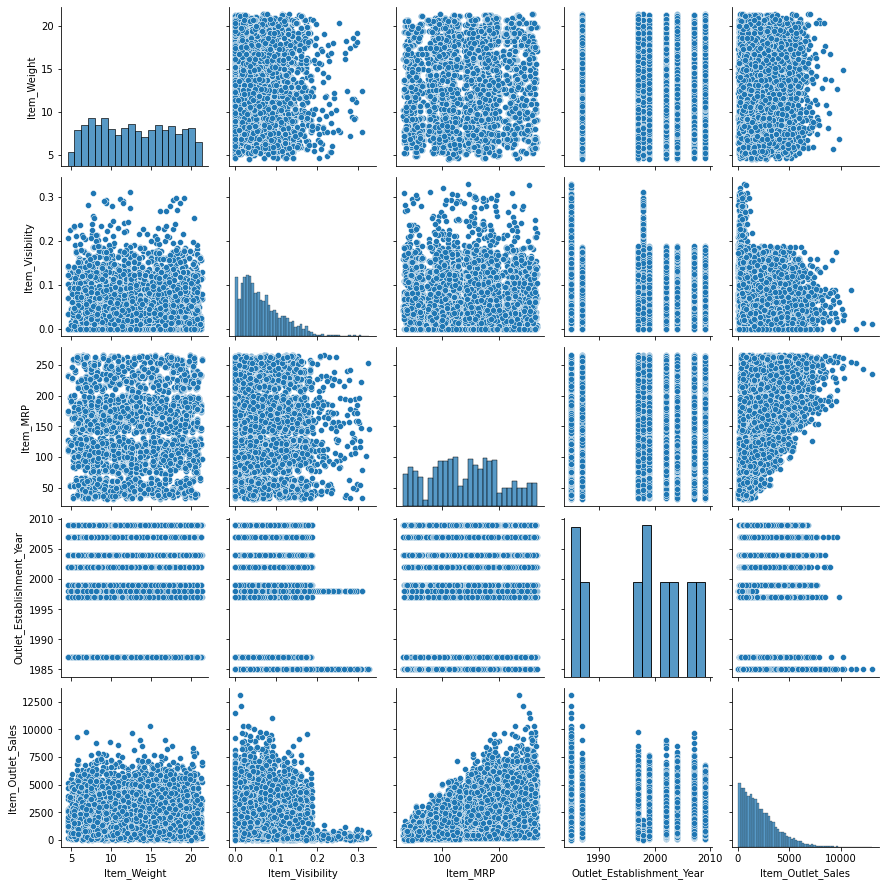

In [17]:
sns.pairplot(df)
plt.show()

### 2.1 Plot the distribution plot for the features

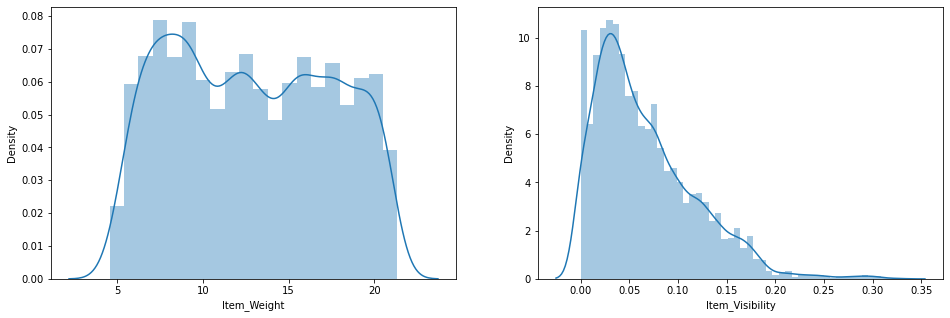

In [18]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Item_Weight'])
plt.subplot(1,2,2)
sns.distplot(df['Item_Visibility'])


plt.show()

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

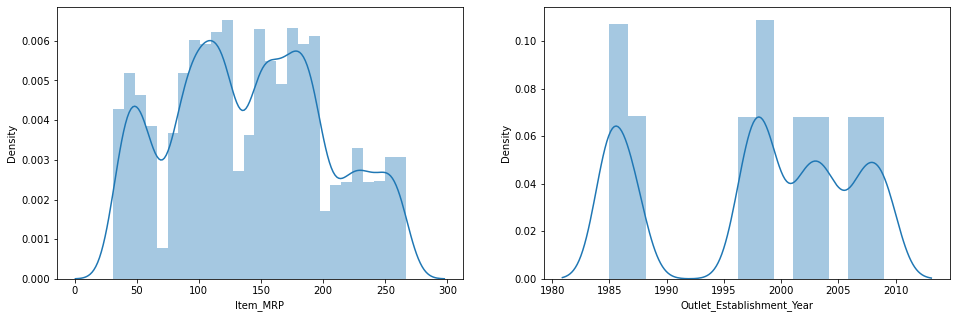

In [19]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Item_MRP']);
plt.subplot(1,2,2)
sns.distplot(df['Outlet_Establishment_Year'])


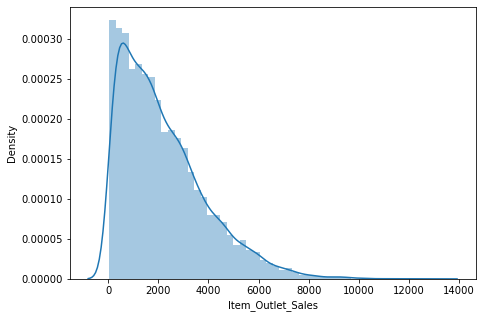

In [20]:
#Distribution of the target variable: Item_Outlet_Sales
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.distplot(df['Item_Outlet_Sales']);

In [21]:
print ("Skew is:", df.Item_Outlet_Sales.skew())
print("Kurtosis: %f" % df.Item_Outlet_Sales.kurt())

Skew is: 1.1775306028542796
Kurtosis: 1.615877


We can see that our target variable is skewed towards the right. Therefore, we have to normalize it.

### 2.2 Univariate Analysis


Now let’s check the numeric independent variables. We’ll again use the histograms for visualizations because that will help us in visualizing the distribution of individual variables.

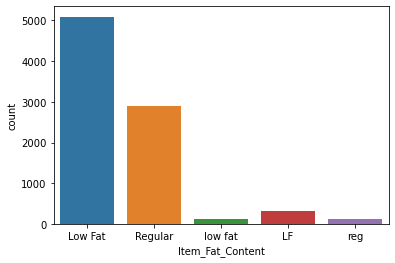

In [22]:
sns.countplot(df["Item_Fat_Content"]);

For Item_Fat_Content there are two possible type “Low Fat” or “Regular”. However, in our data it is written in different manner. We will Correct this.

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

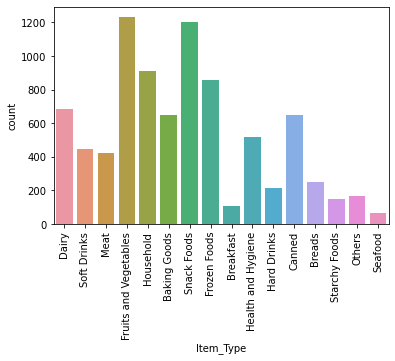

In [23]:
# plt.figure(figsize=(15,5))
l = list(df['Item_Type'].unique())
chart = sns.countplot(df["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90)

Item_Type we have 16 different types of unique values and it is high number for categorical variable. Therefore we must try to reduce it.

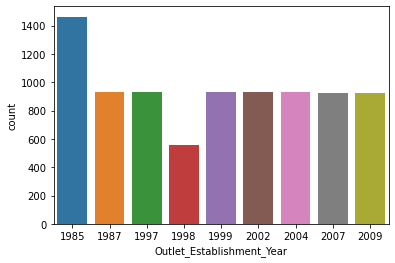

In [24]:
#Distribution of the variable  Outlet_Establishment_Year
sns.countplot(df['Outlet_Establishment_Year']);

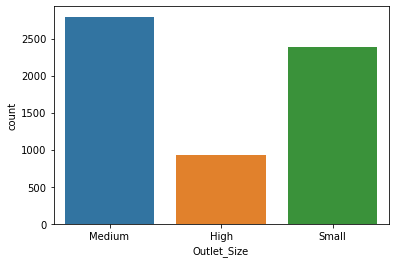

In [25]:
#Distribution of the variable Outlet_Size
sns.countplot(df['Outlet_Size']);

There seems to be less number of stores with size equals to “High”. It will be very interesting to see how this variable relates to our target.

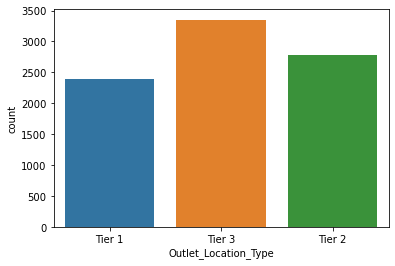

In [26]:
#Distribution of the variable  Outlet_Location_Type
sns.countplot(df['Outlet_Location_Type']);

From the above graph we can see that supermarket is a brand of medium and small size city compare to densely populated area.

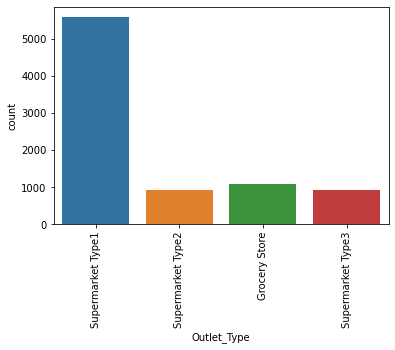

In [27]:
import warnings # Ignores any warning
warnings.filterwarnings("ignore")
#Distribution of the variable Outlet_Type
sns.countplot(df['Outlet_Type'])
plt.xticks(rotation=90);

There seems like Supermarket Type2 , Grocery Store and Supermarket Type3 all have low numbers of stores, we can create a single category with all of three, but before doing this we must see their impact on target variable

<AxesSubplot:>

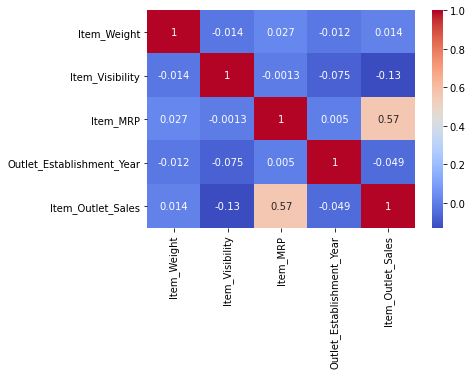

In [28]:
#correlation heatmap
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [29]:
corr['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

From the above result, we can see that Item_MRP have the most positive correlation and the Item_Visibility have the lowest correlation with our target variable. It is totally different from our initial hypotheses, this variables was expected to have high impact in the sales increase. Nevertheless, since this is not an expected behaviour and we should investigate.

### 2.3 Bivariate Analysis
Now it time to see the relationship between our target variable and predictors

After looking at every feature individually, let’s now explore them again with respect to the target variable. Here we will make use of scatter plots for continuous or numeric variables and violin plots for the categorical variables

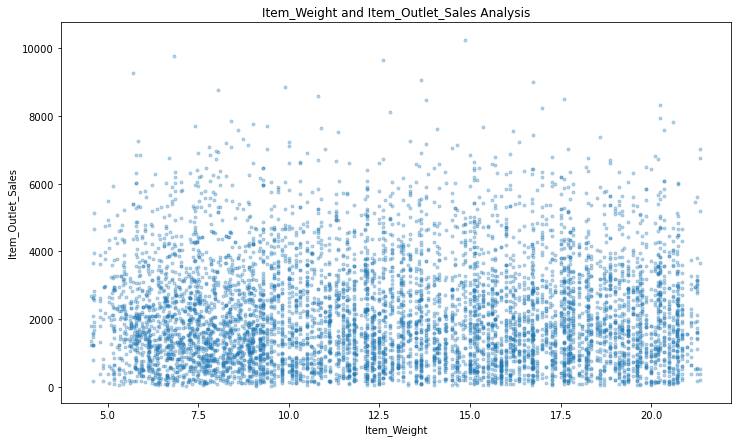

In [30]:
#Item_Weight and item_Outlet_Sale Aanalysis
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(df.Item_Weight, df["Item_Outlet_Sales"],'.', alpha = 0.3);

We saw previously that Item_Weight had a low correlation with our target variable. This plot shows there relation.

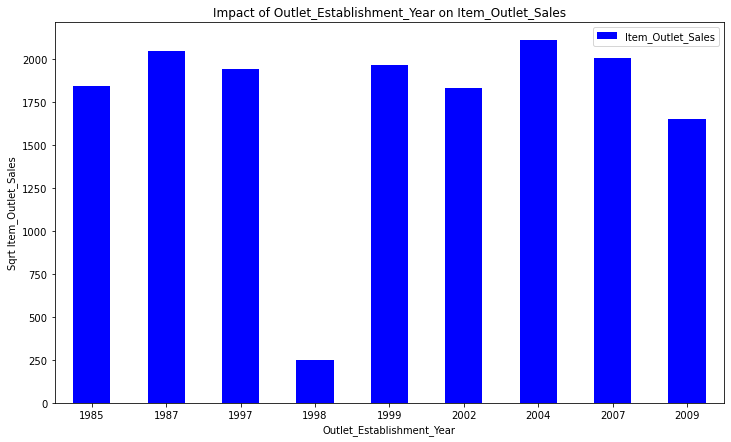

In [31]:
#Outlet_Establishment_Year and Item_Outlet_Sales analysis
Outlet_Establishment_Year_pivot = df.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

There seems to be no appreciable meaning between the year of store establishment and the sales for the items

#### 2.4 Categorical Variables

Now we’ll try to explore and gain some insights from the categorical variables. A categorical variable or feature can have only a finite set of values.

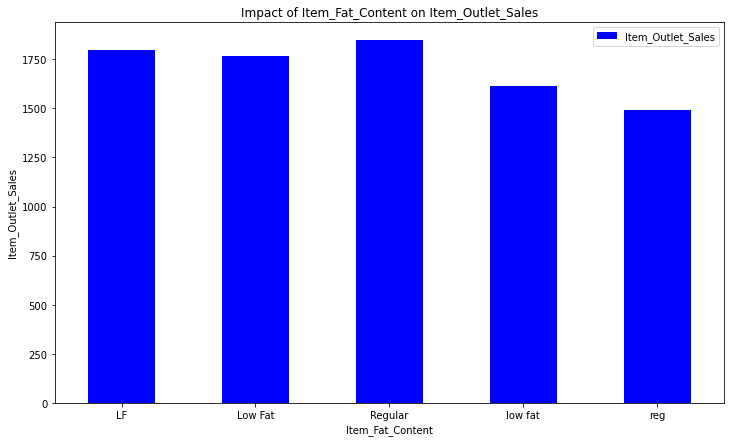

In [32]:
# Impact of Item_Fat_Content on Item_Outlet_Sales
Item_Fat_Content_pivot = df.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()


Low Fat products seem to higher sales than the Regular products

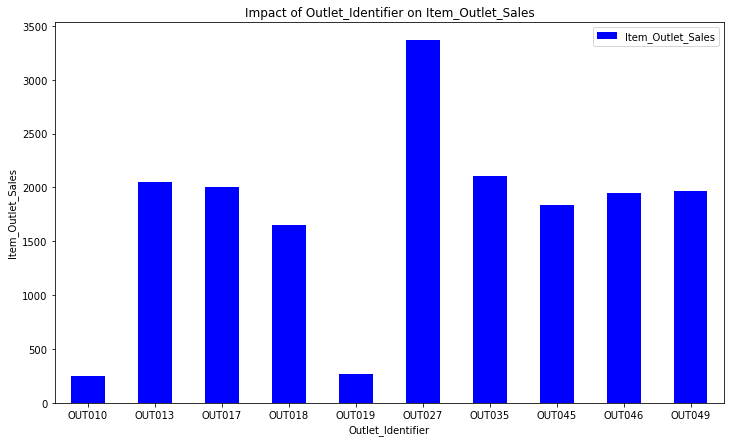

In [33]:
 #Impact of Outlet_Identifier on Item_Outlet_Sales
Outlet_Identifier_pivot = df.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Out of 10- There are 2 Groceries strore, 6 Supermarket Type1, 1Supermarket Type2, and 1 Supermarket Type3. You can see from the below pivot table.

In [34]:
df.pivot_table(values='Outlet_Type',
                  columns='Outlet_Identifier',
                  aggfunc=lambda x:x.mode())

Outlet_Identifier         OUT010             OUT013             OUT017  \
Outlet_Type        Grocery Store  Supermarket Type1  Supermarket Type1   

Outlet_Identifier             OUT018         OUT019             OUT027  \
Outlet_Type        Supermarket Type2  Grocery Store  Supermarket Type3   

Outlet_Identifier             OUT035             OUT045             OUT046  \
Outlet_Type        Supermarket Type1  Supermarket Type1  Supermarket Type1   

Outlet_Identifier             OUT049  
Outlet_Type        Supermarket Type1

In [35]:
df.pivot_table(values='Outlet_Type',
                  columns='Outlet_Size',
                  aggfunc=lambda x:x.mode())

Outlet_Size               High             Medium              Small
Outlet_Type  Supermarket Type1  Supermarket Type3  Supermarket Type1

Most of the stores are of Supermarket Type1 of size High and they do not have best results. whereas Supermarket Type3 (OUT027) is a Medium size store and have best results.

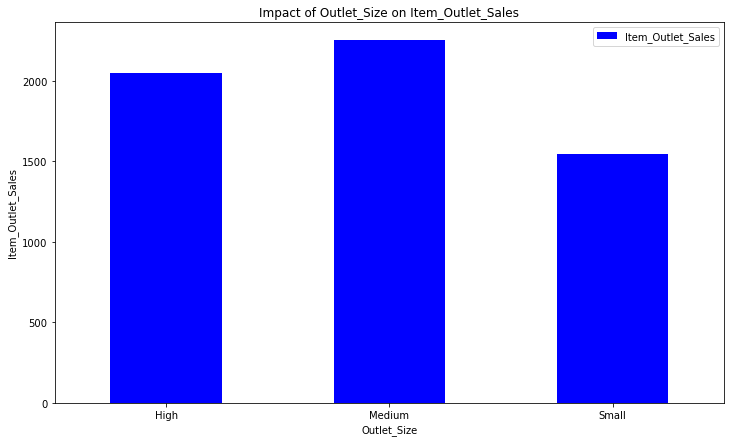

In [36]:
#Impact of Outlet_Size on Item_Outlet_Sales

Outlet_Size_pivot = df.pivot_table(index='Outlet_Size', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Size_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Size")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

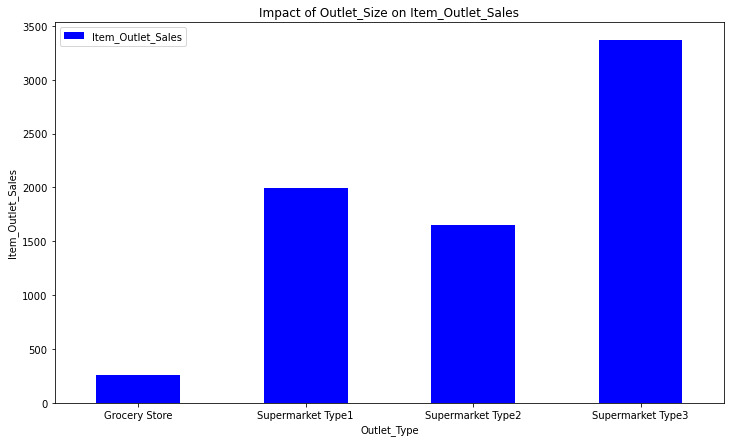

In [37]:
#Impact of Outlet_Type on Item_Outlet_Sales
Outlet_Type_pivot = df.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

It could be a good idea to create a new feature that shows the sales ratio according to the store size.

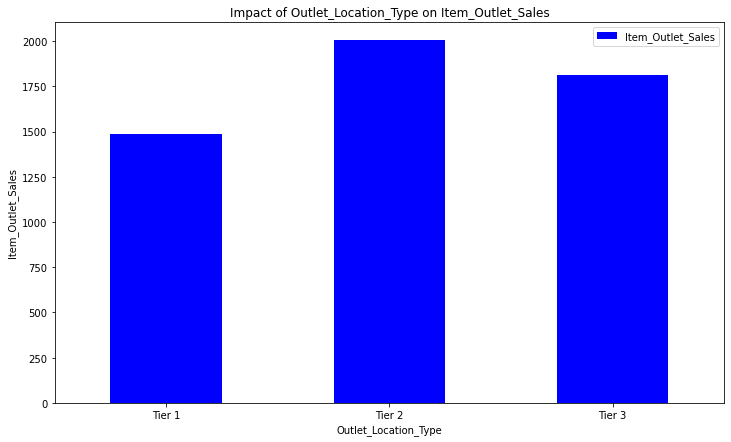

In [38]:
#Impact of Outlet_Location_Type on Item_Outlet_Sales
Outlet_Location_Type_pivot = df.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Location_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Location_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()


This shows that our hypotheses was totaly different from the result that we got from the above plot. Tier 2 cities have the higher sales than the Tier 1 and Tier 2.

In [39]:
df.pivot_table(values='Outlet_Location_Type',
                  columns='Outlet_Type',
                  aggfunc=lambda x:x.mode())

Outlet_Type          Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Location_Type        Tier 3            Tier 2            Tier 3   

Outlet_Type          Supermarket Type3  
Outlet_Location_Type            Tier 3

#### 2.5 Discover outliers with Box-plot

In descriptive statistics, a box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points.

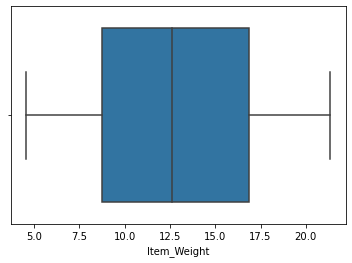

In [40]:
sns.boxplot(df['Item_Weight']);


 Above plot shows outliers

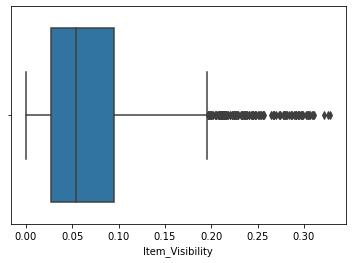

In [41]:
sns.boxplot(df['Item_Visibility']);

Above plot shows many points between o.20 to 0.35, these are outliers as there are not included in the box of other observation i.e no where near the quartiles.

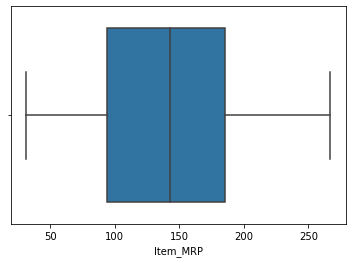

In [42]:
sns.boxplot(df['Item_MRP']);

Above plot shows outliers

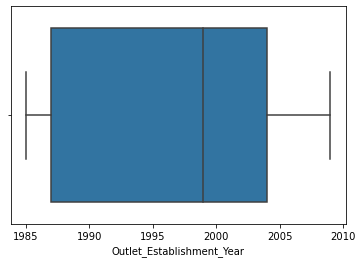

In [43]:
sns.boxplot(df['Outlet_Establishment_Year']);


 Above plot shows outliers

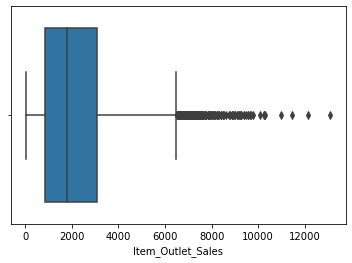

In [44]:
sns.boxplot(df['Item_Outlet_Sales']);

Above plot shows many points between 6000 to 12000, these are outliers as there are not included in the box of other observation i.e no where near the quartiles.

#### 2.6 Finding with IQR

Box plot use the IQR method to display data and outliers(shape of the data) but in order to be get a list of identified outlier, we will need to use the mathematical formula and retrieve the outlier data

In [45]:
percentile25 = df['Item_Visibility'].quantile(0.25)
percentile75 = df['Item_Visibility'].quantile(0.75)

In [46]:
percentile25 = df['Item_Outlet_Sales'].quantile(0.25)
percentile75 = df['Item_Outlet_Sales'].quantile(0.75)


In [47]:
iqr=percentile75-percentile25

In [48]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [49]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Item_Weight                     8.076250
Item_Visibility                 0.067596
Item_MRP                       91.817200
Outlet_Establishment_Year      17.000000
Item_Outlet_Sales            2267.049000
dtype: float64


As we now have the IQR scores, it’s time to get hold on outliers. The below code will give an output with some true and false values. The data point where we have False that means these values are valid whereas True indicates presence of an outlier.

In [50]:
df['Item_Visibility'] > upper_limit
df['Item_Visibility'] < lower_limit



0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [51]:
df['Item_Outlet_Sales'] > upper_limit
df['Item_Outlet_Sales'] < lower_limit

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [52]:
df['Item_Weight'] > upper_limit
df['Item_Weight'] < lower_limit


0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [53]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

 #### 2.7 Working with Outliers: Correcting, Removing

 we can use previously calculated IQR score to filter out the outliers by keeping only valid values.

In [54]:
df = df[~((df < (Q1 - 1.5 * iqr)) |(df > (Q3 + 1.5 * iqr))).any(axis=1)]
df.shape

(8337, 12)

removed around 180+ rows from the dataset i.e. outliers have been removed.


#### 2.8Transform the numerical  variables

Transformation is required to treat the skewed features and make them normally distributed. Right skewed features can be transformed to normality with Square Root/ Cube Root/ Logarithm transformation.I.m using the log transformation on Item_outlet_sales column

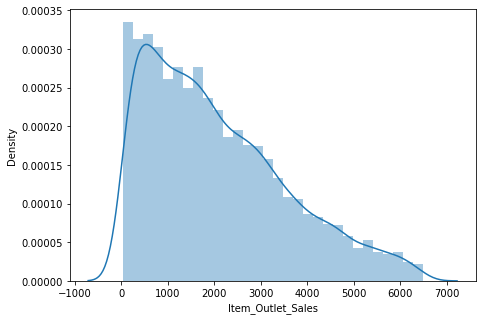

In [55]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.distplot(df['Item_Outlet_Sales']);

In [56]:
# log transformation
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales']);

Skewed Numeric feature may get normally distributed after log transformation. For example, in the below graph Item_Outlet_Sales is normally distributed after the log transformation.

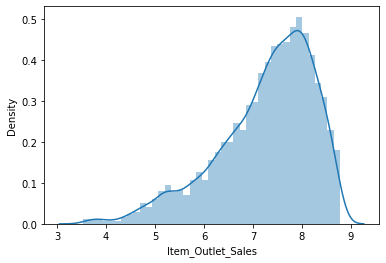

In [57]:
sns.distplot(df['Item_Outlet_Sales']);

In [58]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1           8.225808  
1  Supermarket Type2           6.096776  
2  Supermarket Type1           7.648868  
3      Grocery Store           6.597664  
4  Supermarket Type1           6.903451

### Step 3: Missing Value Imputation

Training a model with a data set that has a lot of missing values can drastically impact the quality of machine learning model. Particularly this problem impacts Deterministic models. ... Hence it becomes necessary to deal with missing data before applying the machine learning model

In general, there are the best 6 methods to handle missing data or values. It is the part of Data Preprocessing and this is the most important step to build Machine Learning/Data Science project. The following are the most popular methods to handle missing data.

•Ignore missing values row / Delete row

•Fill missing value manually

•Use global constant

•Measure of central tendency (Mean, Median & Mode)

•Measure of central tendency for each class

•Most probable value ( ML Algorithms)

In [59]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1360
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2382
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### 2.1 Some observations:

Item_Visibility has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

Outlet_Establishment_Years vary from 1985 to 2009. The values might not be apt in this form. Rather, if we can convert them to how old the particular store is, it should have a better impact on sales.

The lower ‘count’ of Item_Weight and Outlet_Size confirms the findings from the missing value check.



In [60]:
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7715
Item_Type                      16
Item_MRP                     5832
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3322
dtype: int64

This tells us that there are 1559 products and 10 outlets/stores (which was also mentioned in problem statement). Another thing that should catch attention is that Item_Type has 16 unique values. Let’s explore further using the frequency of different categories in each nominal variable.

In [61]:
df.isnull().mean()*100 # % of measing value

Item_Identifier               0.000000
Item_Weight                  16.312822
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.571429
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

Note that Item_Outlet_Sales is the target variable and contains missing values because our test data does not have the Item_Outlet_Sales column.
Nevertheless, we’ll impute the missing values in Item_Weight and Outlet_Size.


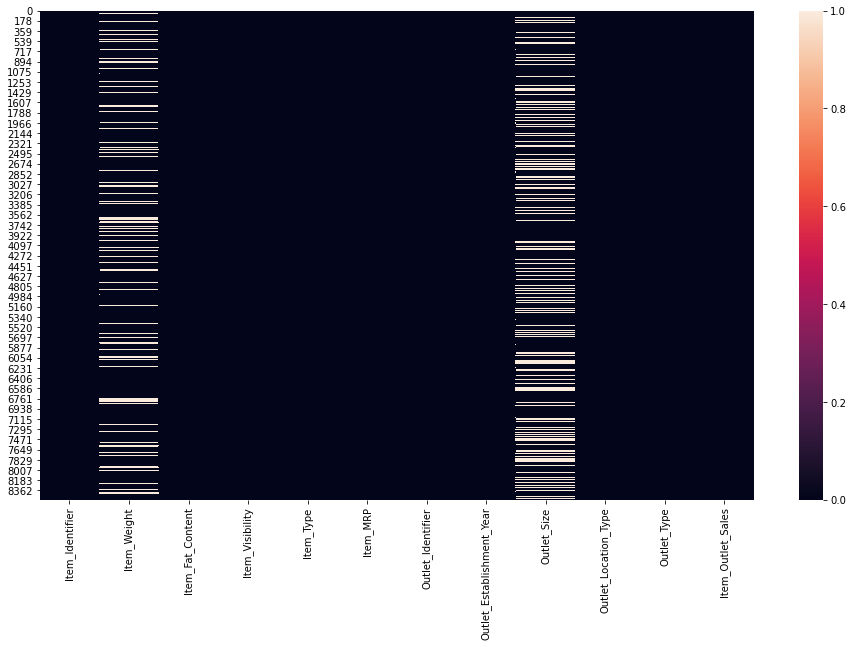

In [62]:
# visualize missing value using heatmap to get idea where is the value missing

plt.figure(figsize=(16,9))
sns.heatmap(df.isnull());

We found two variables with missing values – Item_Weight and Outlet_Size. Lets impute the former by the average weight of the particular item.

In [63]:
#select numerical vxolumns 
num_vars=df.select_dtypes(include=["int64","float64"]).columns

In [64]:
#shows numerical columns
num_vars

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

We can see that out of 12 we have only 5 numeric variables.

Handle missing value with mean

In our EDA we observe that Item_Visibility had minimum value 0. so this make no sense, lets consider it as missing value and impute with its mean.

In [65]:
# replace zeros with mean
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace=True)

In [66]:
missing_num_var = [var for var in df.columns if df[var].isnull().sum()>0]
missing_num_var

['Item_Weight', 'Outlet_Size']

In [67]:
miss_bool = df['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7        True
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18       True
19      False
20      False
21       True
22      False
23       True
24      False
25      False
26      False
27      False
28      False
29       True
30      False
31      False
32      False
33      False
34      False
35      False
36       True
37      False
38       True
39       True
40      False
41      False
42      False
44      False
45      False
46      False
47      False
48      False
49       True
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59       True
60      False
61      False
62       True
63       True
64       True
65      False
66      False
67      False
68      False
69      False
70      False
71      False
72    

In [68]:
df[num_vars].isnull().sum()


Item_Weight                  1360
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales               0
dtype: int64

In [69]:
#fill missing value with mean
df = df.fillna(df.mean())

In [70]:
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium

In [71]:
#fill Outlet_Size missing value with mode
miss_bool = df['Outlet_Size'].isnull()
df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [72]:
df['Outlet_Size'].isnull().sum()

0

In [73]:
df.head()


Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.066358   
4           NCD19         8.93          Low Fat         0.066358   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998       Small               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1           8.225808  
1  Supermarket Type2           6.096776  
2  Supermarket Type1           7.648868  
3      Grocery Store           6.597664  
4  Supermarket Type1           6.903451

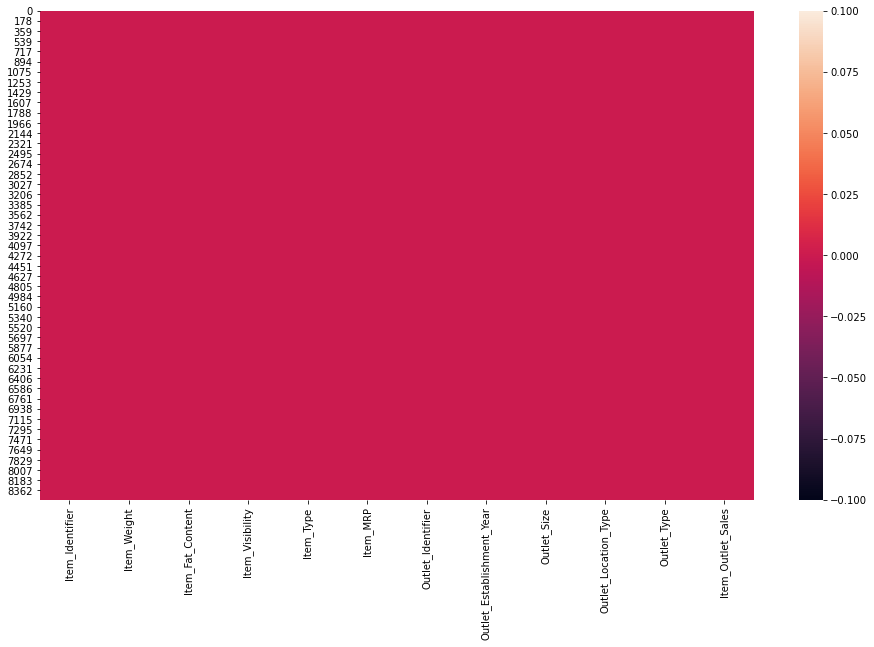

In [74]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull());

In [75]:
sum(df['Item_Visibility']==0)

0

### Step 4: Variable Discretization /Binning

Many machine learning algorithms prefer or perform better when numerical input variables have a standard probability distribution. The discretization transform provides an automatic way to change a numeric input variable to have a different data distribution, which in turn can be used as input to a predictive model

Categorize the Item_Fat_Content  into LF (LOW Fat), reg (Regular), low Fat(low fat)

In [76]:
# combine item fat content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5394
Regular    2943
Name: Item_Fat_Content, dtype: int64

#### 4.1 creating new column
Most of the times the given features in a dataset are not enough to give satisfactory predictions. In such cases, we have to create new features which might help in improving the model’s performance. Let’s try to create some new features for our dataset.

In [77]:
#creating new column
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
5       FD
6       FD
7       FD
8       FD
9       FD
10      FD
11      FD
12      FD
13      FD
14      FD
15      FD
16      NC
17      FD
18      DR
19      FD
20      FD
21      FD
22      NC
23      FD
24      FD
25      NC
26      FD
27      DR
28      FD
29      FD
30      FD
31      NC
32      FD
33      FD
34      DR
35      NC
36      FD
37      DR
38      FD
39      FD
40      FD
41      FD
42      FD
44      FD
45      FD
46      NC
47      FD
48      FD
49      FD
50      NC
51      FD
52      FD
53      FD
54      NC
55      FD
56      NC
57      DR
58      FD
59      FD
60      FD
61      FD
62      FD
63      FD
64      FD
65      FD
66      FD
67      FD
68      DR
69      NC
70      FD
71      FD
72      FD
73      FD
74      NC
75      FD
76      FD
77      FD
78      FD
79      FD
80      FD
81      FD
82      FD
83      NC
84      FD
85      FD
86      FD
87      FD
88      FD
89      FD
90      FD
91      DR

In [78]:
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['New_Item_Type'].value_counts()

Food              5985
Non-Consumable    1570
Drinks             782
Name: New_Item_Type, dtype: int64

In [79]:
df.loc[df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3824
Regular       2943
Non-Edible    1570
Name: Item_Fat_Content, dtype: int64

In [80]:
# create small values for establishment year
df['Outlet_Years'] = 2021 - df['Outlet_Establishment_Year']

In [81]:
df['Outlet_Years']

0       22
1       12
2       22
3       23
4       34
5       12
6       34
7       36
8       19
9       14
10      22
11      24
12      22
13      24
14      34
15      24
16      12
17      22
18      36
19      17
20      34
21      36
22      17
23      36
24      24
25      14
26      17
27      34
28      23
29      36
30      23
31      12
32      12
33      19
34      24
35      22
36      36
37      12
38      36
39      36
40      24
41      34
42      22
44      34
45      23
46      19
47      19
48      24
49      36
50      24
51      34
52      34
53      14
54      14
55      12
56      19
57      22
58      24
59      36
60      12
61      19
62      36
63      36
64      36
65      23
66      17
67      19
68      19
69      24
70      24
71      34
72      19
73      14
74      22
75      24
76      22
77      36
78      14
79      19
80      24
81      24
82      12
83      36
84      36
85      14
86      17
87      36
88      24
89      22
90      23
91      22

In [82]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.066358   
4           NCD19         8.93       Non-Edible         0.066358   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998       Small               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales   New_Item_Type  Outlet_Years  
0  Supermarket Type1           8.225808            Food            22  
1  Supermarket Type2           6.096776          Drinks            12  
2  Supermarket Type1           7.648868            Food            22  
3      Grocery Store           6.597664            Food            23  
4  Supermarket Type1           6.903451  Non-Consumable            34

### Step 5: Categorical Data Encoding

Machine learning models require all input and output variables to be numeric.

This means that if your data contains categorical data, you must encode it to numbers before you can fit and evaluate a model.

The two most popular techniques are an Ordinal Encoding and a One-Hot Encoding

#### label encoding


Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning

In [83]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    df[col] = le.fit_transform(df[col])

For categorical variables where no ordinal relationship exists, the integer encoding may not be enough, at best, or misleading to the model at worst.

Forcing an ordinal relationship via an ordinal encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories).

#### One hot Encoding


For categorical variables where no such ordinal relationship exists, the integer encoding is not enough.

In fact, using this encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories).

In this case, a one-hot encoding can be applied to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.

In [84]:
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
df.head()

Item_Identifier  Item_Weight  Item_Visibility  Item_Type  Item_MRP  \
0           FDA15         9.30         0.016047          4  249.8092   
1           DRC01         5.92         0.019278         14   48.2692   
2           FDN15        17.50         0.016760         10  141.6180   
3           FDX07        19.20         0.066358          6  182.0950   
4           NCD19         8.93         0.066358          9   53.8614   

  Outlet_Identifier  Outlet_Establishment_Year  Item_Outlet_Sales  \
0            OUT049                       1999           8.225808   
1            OUT018                       2009           6.096776   
2            OUT049                       1999           7.648868   
3            OUT010                       1998           6.597664   
4            OUT013                       1987           6.903451   

   Outlet_Years  Outlet  Item_Fat_Content_0  Item_Fat_Content_1  \
0            22       9                   1                   0   
1            12       3                   0                   0   
2            22       9                   1                   0   
3            23       0                   0                   0   
4            34       1                   0                   1   

   Item_Fat_Content_2  Outlet_Size_0  Outlet_Size_1  Outlet_Size_2  \
0                   0              0              1              0   
1                   1              0              1              0   
2                   0              0              1              0   
3                   1              0              0              1   
4                   0              1              0              0   

   Outlet_Location_Type_0  Outlet_Location_Type_1  Outlet_Location_Type_2  \
0                       1                       0                       0   
1                       0                       0                       1   
2                       1                       0                       0   
3                       0                       0                       1   
4                       0                       0                       1   

   Outlet_Type_0  Outlet_Type_1  Outlet_Type_2  Outlet_Type_3  \
0              0              1              0              0   
1              0              0              1              0   
2              0              1              0              0   
3              1              0              0              0   
4              0              1              0              0   

   New_Item_Type_0  New_Item_Type_1  New_Item_Type_2  
0                0                1                0  
1                1                0                0  
2                0                1                0  
3                0                1                0  
4                0                0                1

In [85]:
df.head()

Item_Identifier  Item_Weight  Item_Visibility  Item_Type  Item_MRP  \
0           FDA15         9.30         0.016047          4  249.8092   
1           DRC01         5.92         0.019278         14   48.2692   
2           FDN15        17.50         0.016760         10  141.6180   
3           FDX07        19.20         0.066358          6  182.0950   
4           NCD19         8.93         0.066358          9   53.8614   

  Outlet_Identifier  Outlet_Establishment_Year  Item_Outlet_Sales  \
0            OUT049                       1999           8.225808   
1            OUT018                       2009           6.096776   
2            OUT049                       1999           7.648868   
3            OUT010                       1998           6.597664   
4            OUT013                       1987           6.903451   

   Outlet_Years  Outlet  Item_Fat_Content_0  Item_Fat_Content_1  \
0            22       9                   1                   0   
1            12       3                   0                   0   
2            22       9                   1                   0   
3            23       0                   0                   0   
4            34       1                   0                   1   

   Item_Fat_Content_2  Outlet_Size_0  Outlet_Size_1  Outlet_Size_2  \
0                   0              0              1              0   
1                   1              0              1              0   
2                   0              0              1              0   
3                   1              0              0              1   
4                   0              1              0              0   

   Outlet_Location_Type_0  Outlet_Location_Type_1  Outlet_Location_Type_2  \
0                       1                       0                       0   
1                       0                       0                       1   
2                       1                       0                       0   
3                       0                       0                       1   
4                       0                       0                       1   

   Outlet_Type_0  Outlet_Type_1  Outlet_Type_2  Outlet_Type_3  \
0              0              1              0              0   
1              0              0              1              0   
2              0              1              0              0   
3              1              0              0              0   
4              0              1              0              0   

   New_Item_Type_0  New_Item_Type_1  New_Item_Type_2  
0                0                1                0  
1                1                0                0  
2                0                1                0  
3                0                1                0  
4                0                0                1

### Step 6: Train and Test Split

train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data. With this function, you don't need to divide the dataset manually. By default, Sklearn train_test_split will make random partitions for the two subsets

Item_Outlet_Sales is the TARGET VARIABLE

Split the data into train data (70%) and test data (30%)

In [86]:
X = df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (5835, 22)
Shape of y_train =  (5835,)
Shape of X_test =  (2502, 22)
Shape of y_test =  (2502,)


### Step 7: Feature Engineer

Feature selection is the process of reducing the number of input variables when developing a predictive model.

It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

In [88]:

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#### Standardization:
Standardizing the features around the center and 0 with a standard deviation of 1 is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais

In [89]:
sc = StandardScaler()
sc.fit(X_train )

StandardScaler()

In [90]:
sc.mean_

array([1.29235514e+01, 7.04380593e-02, 7.25055698e+00, 1.38819420e+02,
       2.31876607e+01, 4.68791774e+00, 4.64610111e-01, 1.89031705e-01,
       3.46358183e-01, 1.15338475e-01, 3.20308483e-01, 5.64353042e-01,
       2.86889460e-01, 3.19622965e-01, 3.93487575e-01, 1.34361611e-01,
       6.55184233e-01, 1.11053985e-01, 9.94001714e-02, 9.47729220e-02,
       7.16195373e-01, 1.89031705e-01])

In [91]:
sc.scale_

array([4.23999940e+00, 4.90171802e-02, 4.20196399e+00, 6.15674422e+01,
       8.35103359e+00, 2.86104044e+00, 4.98745983e-01, 3.91533804e-01,
       4.75808987e-01, 3.19429978e-01, 4.66595069e-01, 4.95841392e-01,
       4.52309515e-01, 4.66330489e-01, 4.88523391e-01, 3.41040421e-01,
       4.75308167e-01, 3.14198977e-01, 2.99198558e-01, 2.92901033e-01,
       4.50843167e-01, 3.91533804e-01])

In [92]:
X_train.describe()

Item_Weight  Item_Visibility    Item_Type     Item_MRP  Outlet_Years  \
count  5835.000000      5835.000000  5835.000000  5835.000000   5835.000000   
mean     12.923551         0.070438     7.250557   138.819420     23.187661   
std       4.240363         0.049021     4.202324    61.572719      8.351749   
min       4.555000         0.003589     0.000000    31.290000     12.000000   
25%       9.395000         0.033821     4.000000    92.714600     17.000000   
50%      12.856442         0.062511     6.000000   140.781200     22.000000   
75%      16.100000         0.094337    10.000000   182.927900     34.000000   
max      21.350000         0.328391    15.000000   266.888400     36.000000   

            Outlet  Item_Fat_Content_0  Item_Fat_Content_1  \
count  5835.000000         5835.000000         5835.000000   
mean      4.687918            0.464610            0.189032   
std       2.861286            0.498789            0.391567   
min       0.000000            0.000000            0.000000   
25%       2.000000            0.000000            0.000000   
50%       5.000000            0.000000            0.000000   
75%       7.000000            1.000000            0.000000   
max       9.000000            1.000000            1.000000   

       Item_Fat_Content_2  Outlet_Size_0  Outlet_Size_1  Outlet_Size_2  \
count         5835.000000    5835.000000    5835.000000    5835.000000   
mean             0.346358       0.115338       0.320308       0.564353   
std              0.475850       0.319457       0.466635       0.495884   
min              0.000000       0.000000       0.000000       0.000000   
25%              0.000000       0.000000       0.000000       0.000000   
50%              0.000000       0.000000       0.000000       1.000000   
75%              1.000000       0.000000       1.000000       1.000000   
max              1.000000       1.000000       1.000000       1.000000   

       Outlet_Location_Type_0  Outlet_Location_Type_1  Outlet_Location_Type_2  \
count             5835.000000             5835.000000             5835.000000   
mean                 0.286889                0.319623                0.393488   
std                  0.452348                0.466370                0.488565   
min                  0.000000                0.000000                0.000000   
25%                  0.000000                0.000000                0.000000   
50%                  0.000000                0.000000                0.000000   
75%                  1.000000                1.000000                1.000000   
max                  1.000000                1.000000                1.000000   

       Outlet_Type_0  Outlet_Type_1  Outlet_Type_2  Outlet_Type_3  \
count    5835.000000    5835.000000    5835.000000    5835.000000   
mean        0.134362       0.655184       0.111054       0.099400   
std         0.341070       0.475349       0.314226       0.299224   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       1.000000       0.000000       0.000000   
75%         0.000000       1.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       New_Item_Type_0  New_Item_Type_1  New_Item_Type_2  
count      5835.000000      5835.000000      5835.000000  
mean          0.094773         0.716195         0.189032  
std           0.292926         0.450882         0.391567  
min           0.000000         0.000000         0.000000  
25%           0.000000         0.000000         0.000000  
50%           0.000000         1.000000         0.000000  
75%           0.000000         1.000000         0.000000  
max           1.000000         1.000000         1.000000

In [93]:
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [94]:
X_train_sc

array([[ 1.57463434, -0.57354387,  0.17835541, ..., -0.32356636,
        -1.58856877,  2.07125997],
       [ 0.01803034,  0.0030597 ,  1.36827517, ..., -0.32356636,
         0.62949746, -0.48279792],
       [ 1.02038897,  1.82911056, -0.29761249, ..., -0.32356636,
         0.62949746, -0.48279792],
       ...,
       [ 1.71614379, -0.12187385,  1.36827517, ..., -0.32356636,
         0.62949746, -0.48279792],
       [ 1.75152115,  1.46796802,  1.36827517, ..., -0.32356636,
         0.62949746, -0.48279792],
       [ 1.71614379,  0.6009192 ,  0.41633936, ..., -0.32356636,
        -1.58856877,  2.07125997]])

In [95]:
X_train_sc =  pd.DataFrame(X_train_sc,columns = ["Item_Weight",'Item_Visibility','Item_Type','Item_MRP','Outlet_Years','Outlet','Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2','Outlet_Size_0','Outlet_Location_Type_0','Outlet_Location_Type_1','Outlet_Location_Type_2','Outlet_Type_0','Outlet_Type_1','Outlet_Type_2','Outlet_Type_3','New_Item_Type_0','New_Item_Type_1','New_Item_Type_2','Outlet_Establishment_Year','Outlet_Identifier'])
X_test_sc =  pd.DataFrame(X_test_sc,columns = ["Item_Weight",'Item_Visibility','Item_Type','Item_MRP','Outlet_Years','Outlet','Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2','Outlet_Size_0','Outlet_Location_Type_0','Outlet_Location_Type_1','Outlet_Location_Type_2','Outlet_Type_0','Outlet_Type_1','Outlet_Type_2','Outlet_Type_3','New_Item_Type_0','New_Item_Type_1','New_Item_Type_2','Outlet_Establishment_Year','Outlet_Identifier'])

In [96]:
X_train_sc.head()

Item_Weight  Item_Visibility  Item_Type  Item_MRP  Outlet_Years    Outlet  \
0     1.574634        -0.573544   0.178355  0.196256     -0.022472 -1.638536   
1     0.018030         0.003060   1.368275 -1.183597     -1.339674 -0.589966   
2     1.020389         1.829111  -0.297612 -1.255534     -1.100182 -0.939490   
3     1.834068        -0.631825   0.416339  0.209805     -1.100182 -0.939490   
4    -0.015828         4.358223   1.368275 -0.540175      1.534222 -0.240443   

   Item_Fat_Content_0  Item_Fat_Content_1  Item_Fat_Content_2  Outlet_Size_0  \
0           -0.931557            2.071260           -0.727935      -0.361076   
1           -0.931557           -0.482798            1.373748      -0.361076   
2           -0.931557           -0.482798            1.373748      -0.361076   
3           -0.931557            2.071260           -0.727935      -0.361076   
4            1.073472           -0.482798           -0.727935      -0.361076   

   Outlet_Location_Type_0  Outlet_Location_Type_1  Outlet_Location_Type_2  \
0               -0.686481                0.878601               -0.634277   
1                1.456705               -1.138173               -0.634277   
2               -0.686481                0.878601               -0.634277   
3               -0.686481                0.878601               -0.634277   
4               -0.686481                0.878601                1.576599   

   Outlet_Type_0  Outlet_Type_1  Outlet_Type_2  Outlet_Type_3  \
0      -0.685400       1.241522       2.538228      -1.378441   
1      -0.685400       1.241522      -0.393976      -1.378441   
2       1.459002      -0.805463      -0.393976       0.725457   
3       1.459002      -0.805463      -0.393976       0.725457   
4      -0.685400      -0.805463       2.538228      -1.378441   

   New_Item_Type_0  New_Item_Type_1  New_Item_Type_2  \
0        -0.353451        -0.332221        -0.323566   
1         2.829245        -0.332221        -0.323566   
2        -0.353451        -0.332221        -0.323566   
3        -0.353451        -0.332221        -0.323566   
4        -0.353451        -0.332221        -0.323566   

   Outlet_Establishment_Year  Outlet_Identifier  
0                  -1.588569           2.071260  
1                   0.629497          -0.482798  
2                   0.629497          -0.482798  
3                  -1.588569           2.071260  
4                   0.629497          -0.482798

In [97]:
X_train_sc.describe().round(2)

Item_Weight  Item_Visibility  Item_Type  Item_MRP  Outlet_Years  \
count      5835.00          5835.00    5835.00   5835.00       5835.00   
mean          0.00             0.00       0.00     -0.00         -0.00   
std           1.00             1.00       1.00      1.00          1.00   
min          -1.97            -1.36      -1.73     -1.75         -1.34   
25%          -0.83            -0.75      -0.77     -0.75         -0.74   
50%          -0.02            -0.16      -0.30      0.03         -0.14   
75%           0.75             0.49       0.65      0.72          1.29   
max           1.99             5.26       1.84      2.08          1.53   

        Outlet  Item_Fat_Content_0  Item_Fat_Content_1  Item_Fat_Content_2  \
count  5835.00             5835.00             5835.00             5835.00   
mean      0.00                0.00                0.00               -0.00   
std       1.00                1.00                1.00                1.00   
min      -1.64               -0.93               -0.48               -0.73   
25%      -0.94               -0.93               -0.48               -0.73   
50%       0.11               -0.93               -0.48               -0.73   
75%       0.81                1.07               -0.48                1.37   
max       1.51                1.07                2.07                1.37   

       Outlet_Size_0  Outlet_Location_Type_0  Outlet_Location_Type_1  \
count        5835.00                 5835.00                 5835.00   
mean            0.00                    0.00                   -0.00   
std             1.00                    1.00                    1.00   
min            -0.36                   -0.69                   -1.14   
25%            -0.36                   -0.69                   -1.14   
50%            -0.36                   -0.69                    0.88   
75%            -0.36                    1.46                    0.88   
max             2.77                    1.46                    0.88   

       Outlet_Location_Type_2  Outlet_Type_0  Outlet_Type_1  Outlet_Type_2  \
count                 5835.00        5835.00        5835.00        5835.00   
mean                     0.00          -0.00          -0.00           0.00   
std                      1.00           1.00           1.00           1.00   
min                     -0.63          -0.69          -0.81          -0.39   
25%                     -0.63          -0.69          -0.81          -0.39   
50%                     -0.63          -0.69          -0.81          -0.39   
75%                      1.58           1.46           1.24          -0.39   
max                      1.58           1.46           1.24           2.54   

       Outlet_Type_3  New_Item_Type_0  New_Item_Type_1  New_Item_Type_2  \
count        5835.00          5835.00          5835.00          5835.00   
mean           -0.00            -0.00            -0.00             0.00   
std             1.00             1.00             1.00             1.00   
min            -1.38            -0.35            -0.33            -0.32   
25%            -1.38            -0.35            -0.33            -0.32   
50%             0.73            -0.35            -0.33            -0.32   
75%             0.73            -0.35            -0.33            -0.32   
max             0.73             2.83             3.01             3.09   

       Outlet_Establishment_Year  Outlet_Identifier  
count                    5835.00            5835.00  
mean                        0.00               0.00  
std                         1.00               1.00  
min                        -1.59              -0.48  
25%                        -1.59              -0.48  
50%                         0.63              -0.48  
75%                         0.63              -0.48  
max                         0.63               2.07

#### Normalization

Similarly, the goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges

In [98]:
mmc = MinMaxScaler()
mmc.fit(X_train)

MinMaxScaler()

In [99]:
X_train_mmc = mmc.transform(X_train)
X_test_mmc = mmc.transform(X_test)

In [100]:
X_train_mmc

array([[0.89580232, 0.11925872, 0.53333333, ..., 0.        , 0.        ,
        1.        ],
       [0.50282822, 0.20627633, 0.86666667, ..., 0.        , 1.        ,
        0.        ],
       [0.75587973, 0.48185317, 0.4       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.93152724, 0.1874221 , 0.86666667, ..., 0.        , 1.        ,
        0.        ],
       [0.94045847, 0.42735166, 0.86666667, ..., 0.        , 1.        ,
        0.        ],
       [0.93152724, 0.29650176, 0.6       , ..., 0.        , 0.        ,
        1.        ]])

In [101]:
X_train_mmc =  pd.DataFrame(X_train_mmc,columns = ["Item_Weight",'Item_Visibility','Item_Type','Item_MRP','Outlet_Years','Outlet','Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2','Outlet_Size_0','Outlet_Location_Type_0','Outlet_Location_Type_1','Outlet_Location_Type_2','Outlet_Type_0','Outlet_Type_1','Outlet_Type_2','Outlet_Type_3','New_Item_Type_0','New_Item_Type_1','New_Item_Type_2','Outlet_Establishment_Year','Outlet_Identifier'])
X_test_mmc =  pd.DataFrame(X_test_mmc,columns = ["Item_Weight",'Item_Visibility','Item_Type','Item_MRP','Outlet_Years','Outlet','Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2','Outlet_Size_0','Outlet_Location_Type_0','Outlet_Location_Type_1','Outlet_Location_Type_2','Outlet_Type_0','Outlet_Type_1','Outlet_Type_2','Outlet_Type_3','New_Item_Type_0','New_Item_Type_1','New_Item_Type_2','Outlet_Establishment_Year','Outlet_Identifier'])

In [102]:
X_train_mmc.describe().round(2)

Item_Weight  Item_Visibility  Item_Type  Item_MRP  Outlet_Years  \
count      5835.00          5835.00    5835.00   5835.00       5835.00   
mean          0.50             0.21       0.48      0.46          0.47   
std           0.25             0.15       0.28      0.26          0.35   
min           0.00             0.00       0.00      0.00          0.00   
25%           0.29             0.09       0.27      0.26          0.21   
50%           0.49             0.18       0.40      0.46          0.42   
75%           0.69             0.28       0.67      0.64          0.92   
max           1.00             1.00       1.00      1.00          1.00   

        Outlet  Item_Fat_Content_0  Item_Fat_Content_1  Item_Fat_Content_2  \
count  5835.00             5835.00             5835.00             5835.00   
mean      0.52                0.46                0.19                0.35   
std       0.32                0.50                0.39                0.48   
min       0.00                0.00                0.00                0.00   
25%       0.22                0.00                0.00                0.00   
50%       0.56                0.00                0.00                0.00   
75%       0.78                1.00                0.00                1.00   
max       1.00                1.00                1.00                1.00   

       Outlet_Size_0  Outlet_Location_Type_0  Outlet_Location_Type_1  \
count        5835.00                 5835.00                 5835.00   
mean            0.12                    0.32                    0.56   
std             0.32                    0.47                    0.50   
min             0.00                    0.00                    0.00   
25%             0.00                    0.00                    0.00   
50%             0.00                    0.00                    1.00   
75%             0.00                    1.00                    1.00   
max             1.00                    1.00                    1.00   

       Outlet_Location_Type_2  Outlet_Type_0  Outlet_Type_1  Outlet_Type_2  \
count                 5835.00        5835.00        5835.00        5835.00   
mean                     0.29           0.32           0.39           0.13   
std                      0.45           0.47           0.49           0.34   
min                      0.00           0.00           0.00           0.00   
25%                      0.00           0.00           0.00           0.00   
50%                      0.00           0.00           0.00           0.00   
75%                      1.00           1.00           1.00           0.00   
max                      1.00           1.00           1.00           1.00   

       Outlet_Type_3  New_Item_Type_0  New_Item_Type_1  New_Item_Type_2  \
count        5835.00          5835.00           5835.0          5835.00   
mean            0.66             0.11              0.1             0.09   
std             0.48             0.31              0.3             0.29   
min             0.00             0.00              0.0             0.00   
25%             0.00             0.00              0.0             0.00   
50%             1.00             0.00              0.0             0.00   
75%             1.00             0.00              0.0             0.00   
max             1.00             1.00              1.0             1.00   

       Outlet_Establishment_Year  Outlet_Identifier  
count                    5835.00            5835.00  
mean                        0.72               0.19  
std                         0.45               0.39  
min                         0.00               0.00  
25%                         0.00               0.00  
50%                         1.00               0.00  
75%                         1.00               0.00  
max                         1.00               1.00

### Step 8: Linear Regression Modelling
It builds up a connection between subordinate variable (Y) and at least one autonomous factors (X) 
utilizing a best fit straight line (otherwise called relapse line). The fundamental thought of this calculation 
is to fit a straight line between preparing informational index and a persistent objective variable. This 
calculation finds a line that best fits the information
After completing the previous phases, the dataset is now ready to build proposed model. Once the model is build it is used as predictive model to forecast salesof sale. In our work, we propose a model using linear regression algorithm 
Now I am applying linear regression on the particular dataset and after that, we will study each evaluation metric and check it on our Linear Regression model.

In [103]:
#fitting/training the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
#Evaluate the model
print("R2 of model is equal to ",lr.score(X,y))


R2 of model is equal to  0.7098560544826011


let’s start Exploring various Evaluation metrics

In [104]:
# Now let us make the prediction for out test data,which we had split test already
#let us recall what our X_test and Y_test  looks like,as we will be making our prediction by using X_test and will compare it with y_test
X_test

Item_Weight  Item_Visibility  Item_Type  Item_MRP  Outlet_Years  Outlet  \
8491    10.395000         0.037033         10  227.9352            12       3   
2377    12.350000         0.033761         10  196.9426            24       8   
526      8.600000         0.032754          8  140.5154            12       3   
8056    16.200000         0.050546          9  191.6162            12       3   
1689    12.856442         0.048546          1   60.1194            36       5   
8058    11.800000         0.179192          4  224.2772            23       0   
5857    12.856442         0.062920          4   88.9856            36       5   
3434     6.260000         0.009924         10  152.8366            14       2   
5922    10.500000         0.142760          1  159.3578            22       9   
7005    10.100000         0.279784         14  241.8512            23       0   
3531    17.250000         0.113497          9  253.4724            17       6   
8418    14.600000         0.151181         14   47.5692            12       3   
400     12.856442         0.026917         11   50.9666            36       5   
4637    12.856442         0.066358          3   92.3120            36       4   
1538    10.195000         0.108005         13  148.7076            14       2   
1883    10.800000         0.058433          7   74.7380            24       8   
8031    12.856442         0.011835         11  121.3730            36       4   
3739     6.590000         0.066358          9  119.1098            14       2   
6712    15.100000         0.100061          6  144.0786            19       7   
4687    20.250000         0.058936          9  246.6460            24       8   
7297    12.856442         0.170001          4  155.9630            36       5   
5246    17.100000         0.067154          9  114.3860            24       8   
1007     8.655000         0.088121         13  119.7756            34       1   
2038    19.100000         0.092438         11  185.2608            14       2   
7509    12.856442         0.095331          5  125.5678            36       5   
2823     8.880000         0.098822          9  209.6270            19       7   
6491    20.350000         0.150948         10   81.0276            34       1   
50       7.390000         0.067780          8  143.8812            24       8   
5174     7.960000         0.028479          3  161.8894            12       3   
4919     9.100000         0.055515          9  112.5518            22       9   
4748    12.856442         0.046334          8   97.2384            36       5   
8352     5.175000         0.030479          8   33.2874            12       3   
7129     7.785000         0.088692          6   61.8510            17       6   
5086    11.100000         0.059836          6  151.3366            17       6   
7786    14.650000         0.066358          6   49.7692            19       7   
6367    10.000000         0.149223          8  145.8102            23       0   
2710    20.600000         0.023449          6   93.9778            17       6   
4977     5.110000         0.034875          9  161.7210            24       8   
5215     6.365000         0.066358          5   59.7536            14       2   
3820     6.890000         0.136984         13  192.6820            12       3   
5149     6.960000         0.077630         14   90.9146            14       2   
3138    14.850000         0.093843          0  142.3812            12       3   
4051     6.695000         0.066358          5  219.4456            24       8   
2331     5.820000         0.066358          6  256.6330            22       9   
1098    17.500000         0.026925          5  264.3910            19       7   
2126    12.850000         0.033152         13  170.6422            34       1   
1881    13.100000         0.012089         11  189.8530            34       1   
283     20.750000         0.021370         14  153.0024            14       2   
6563    13.100000         0.006087   

In [105]:
y_test

8491    8.478606
2377    8.545257
526     5.651193
8056    7.457463
1689    7.017102
8058    6.504485
5857    8.165200
3434    8.237325
5922    8.022798
7005    6.185596
3531    6.628064
8418    6.096776
400     6.577489
4637    5.923849
1538    7.193887
1883    6.933747
8031    5.510788
3739    6.872209
6712    7.863888
4687    7.809728
7297    8.420336
5246    7.127731
1007    7.630939
2038    7.293756
7509    7.841633
2823    7.543561
6491    7.533284
50      8.050571
5174    7.919872
4919    5.836433
4748    7.886659
8352    6.455471
7129    7.283292
5086    8.014247
7786    6.731706
6367    6.775208
2710    7.943546
4977    7.802951
5215    6.888631
3820    7.902542
5149    7.286489
3138    7.039529
4051    8.037749
2331    7.626406
1098    8.568042
2126    7.983617
1881    8.136388
283     7.731069
6563    7.534708
8134    7.123983
1351    4.509573
4597    8.140084
1368    8.405706
8006    7.681950
8383    8.560802
7726    8.442246
39      7.687766
660     4.743643
4574    7.7426

In [106]:
y_pred = lr.predict(X_test)
y_pred

array([8.02418373, 7.94517551, 7.31270591, ..., 8.71085246, 6.72089369,
       7.26106423])

#### Mean Absolute Error(MAE)
MAE is a very simple metric which calculates the absolute difference between actual and predicted values.Now find the difference between the actual value and predicted value that is an absolute error but we have to find the mean absolute of the complete dataset.

In [107]:
#Now let us compute some metrics to use the evaluating model's ability to predict the test data
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.4121685604242166


#### Mean Squared Error(MSE)
MSE is a most used and very simple metric with a little bit of change in mean absolute error. Mean squared error states that finding the squared difference between actual and predicted value.
So, above we are finding the absolute difference and here we are finding the squared difference.

In [108]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.2804396989210829


#### Root Mean Squared Error(RMSE)
As RMSE is clear by the name itself, that it is a simple square root of mean squared error.

In [109]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.5295655756571446


### Summary and Future Improvements
We are predicting the accuracy for linear Regression model Our predictions help supermarket to refine their methodologies and 
strategies which in turn helps them to increase their profit. The results predicted will be very useful for the executives of the 
company to know about their sales and profits.
Experts also shown that a smart sales forecasting program is required to manage vast volumes of data for businessorganizations. 
Business assessments are based on the speed and precision of the methods used to analyze the results.The Machine Learning Methods presented in this research provide an effective method for data shaping and decision-making. New approaches that can better identify consumer needs and formulate marketing plans will be implemented.The outcome of machine learning algorithms will help to select the most suitable demand prediction algorithm and with the aid of which supermarket will prepare its marketing